## Data Description

Entegrasyon Çalışmaları için Solar Güç Verileri, yaklaşık 6.000 simüle edilmiş PV tesisi için 1 yıllık (2006) 5 dakikalık solar güç ve saatlik günlük tahminlerden oluşmaktadır. Solar santral konumları, Batı Rüzgarı ve Solar Entegrasyon Çalışması'nın 2. Aşaması ve Doğu Yenilenebilir Enerji Üretimi Entegrasyon Çalışması'nda yüksek penetrasyonlu yenilenebilir enerji için kapasite genişleme planına göre belirlenmiştir.

NREL, Sub-Hour Irradiance Algoritması'nı kullanarak 5 dakikalık veri setini oluşturmuştur. Batı Amerika Birleşik Devletleri'ndeki lokasyonlar için günlük solar tahmin verileri, Batı Rüzgarı ve Solar Entegrasyon Çalışması'nın 1. Aşaması için sayısal hava tahmini simülasyonlarına dayanarak 3TIER tarafından oluşturulmuştur. NREL, Doğu ABD'deki lokasyonlarda günlük solar tahmin verilerini Hava Araştırmaları ve Tahmin Modeli'ni kullanarak oluşturmuştur.

Veriler belirli yıllara aittir ve bir saha için tipik radyasyon seviyelerini temsil ettiği varsayılmamalıdır. Bu veriler genellikle sahaya özel proje geliştirme çalışmaları için kullanılmamalıdır.

## Adlandırma Kuralları

Solar Entegrasyon Çalışmaları'ndan eyalet bazlı solar güç verilerinin (.csv dosyaları) adlandırma kuralı aşağıdaki gibidir.

Veri Tipi_Enlem_Boylam_Hava Yılı_PV Tipi_KapasiteMW_Zaman Aralığı_Min.csv

**Veri Tipi**
*   Actual: Gerçek güç çıkışı
*   DA: Günlük tahmin
*   HA4: 4 saatlik tahmin

**Hava Yılı**: PV verileri, belirli bir yılın bilinen hava koşullarına dayanmaktadır.

**PV Tipi**
*   UPV: Şebeke ölçekli PV
*   DPV: Dağıtılmış PV

Not: UPV ve DPV arasındaki pratik fark, konfigürasyonlarda (UPV tek eksenli izlemeye sahipken, DPV enlemine eşit sabit eğimlidir) ve düzgünleştirmededir (her ikisi de bir alçak geçiren filtreden geçirilir, DPV daha yüksek frekanslı değişkenliği daha fazla düzgünleştirilmiş olacaktır).

**Kapasite**: Kurulum kapasitesi MW olarak

**Zaman Aralığı**: PV üretim verisi okuma aralığı dakika olarak.
 https://www.nrel.gov/grid/solar-power-data

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os
import pandas as pd

directory_path = "/content/drive/MyDrive/grid_datasets/alabama_solar_power/"
all_items = os.listdir(directory_path)
csv_files = [item for item in all_items if item.endswith('.csv')]



In [ ]:
file_metadata = []

for csv_file in csv_files:
    # Remove the '.csv' extension and split the filename by underscores
    file_name_parts = csv_file.replace('.csv', '').split('_')

    # Extract metadata based on the naming convention
    metadata = {
        "Data Type": file_name_parts[0],
        "Latitude": file_name_parts[1],
        "Longitude": file_name_parts[2],
        "Weather Year": file_name_parts[3],
        "PV Type": file_name_parts[4],
        "CapacityMW": file_name_parts[5].replace('MW', ''),
        "Time Interval": file_name_parts[6]
    }
    file_metadata.append(metadata)

# Convert the list of metadata dictionaries to a Pandas DataFrame
metadata_df = pd.DataFrame(file_metadata)

# Display the first few rows of the metadata DataFrame
display(metadata_df.head())

,Data Type,Latitude,Longitude,Weather Year,PV Type,CapacityMW,Time Interval
0,Actual,30.65,-88.35,2006,UPV,10,5
1,Actual,31.05,-85.65,2006,UPV,70,5
2,Actual,31.15,-87.65,2006,UPV,30,5
3,Actual,30.75,-87.95,2006,UPV,30,5
4,Actual,30.45,-88.25,2006,UPV,70,5


In [ ]:
import warnings
warnings.filterwarnings("ignore")

all_dataframes = []
for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    df = pd.read_csv(file_path)
    df['LocalTime'] = pd.to_datetime(df['LocalTime'])
    all_dataframes.append(df)

merged_df = pd.concat(all_dataframes)

display(merged_df.head())
merged_df.info()

,LocalTime,Power(MW)
0,2006-01-01 00:00:00,0.0
1,2006-01-01 00:05:00,0.0
2,2006-01-01 00:10:00,0.0
3,2006-01-01 00:15:00,0.0
4,2006-01-01 00:20:00,0.0


<class 'pandas.core.frame.DataFrame'>
Index: 16801680 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column     Dtype         
---  ------     -----         
 0   LocalTime  datetime64[ns]
 1   Power(MW)  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 384.6 MB


In [ ]:
print("Descriptive statistics:")
display(merged_df.describe())

print("\nData types and non-null counts:")
merged_df.info()

print("\nMissing values per column:")
display(merged_df.isnull().sum())

Descriptive statistics:


,LocalTime,Power(MW)
count,16801680,1.680168e+07
mean,2006-07-02 11:53:34.285710848,6.364065e+00
min,2006-01-01 00:00:00,0.000000e+00
25%,2006-04-02 05:58:45,0.000000e+00
50%,2006-07-02 11:57:30,0.000000e+00
75%,2006-10-01 17:56:15,1.110000e+01
max,2006-12-31 23:55:00,9.010000e+01
std,NaN,1.016730e+01



Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
Index: 16801680 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column     Dtype         
---  ------     -----         
 0   LocalTime  datetime64[ns]
 1   Power(MW)  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 384.6 MB

Missing values per column:


,0
LocalTime,0
Power(MW),0


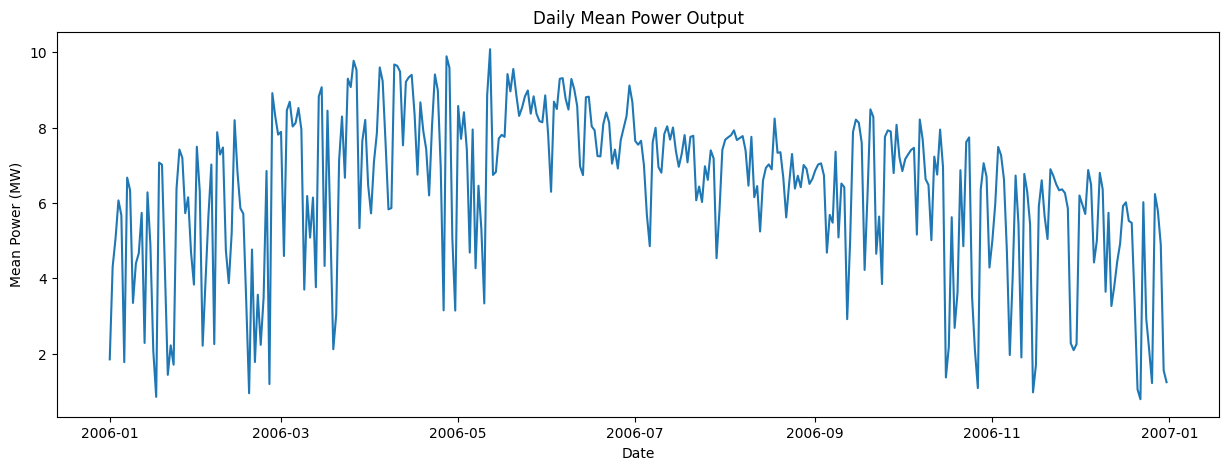

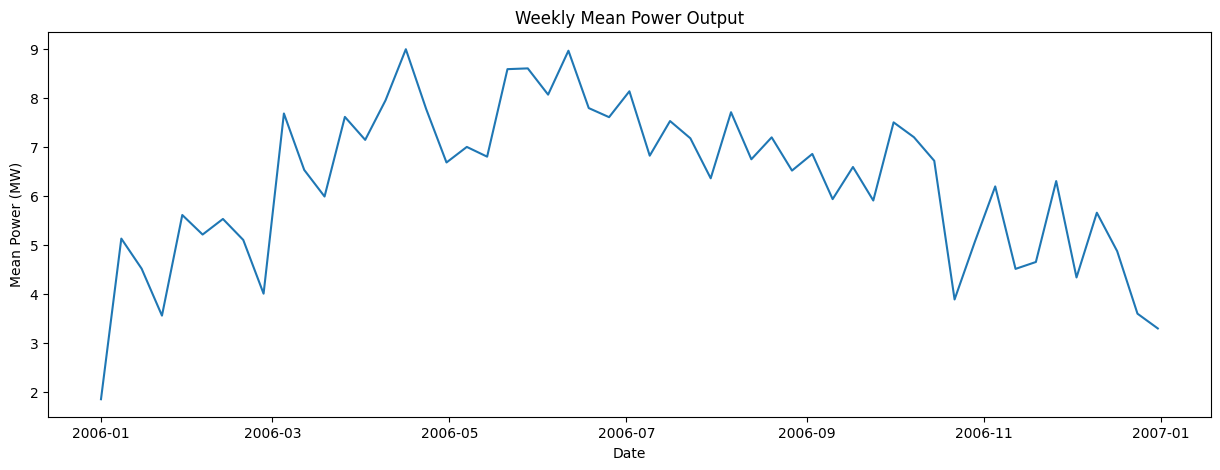

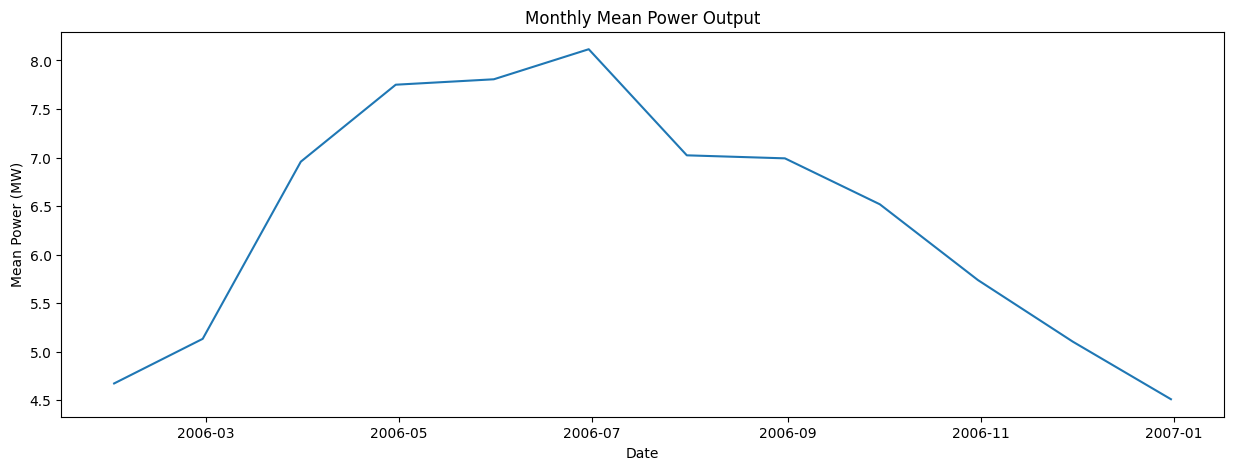

In [ ]:
merged_df = merged_df.set_index('LocalTime')

daily_mean_power = merged_df['Power(MW)'].resample('D').mean()
weekly_mean_power = merged_df['Power(MW)'].resample('W').mean()
monthly_mean_power = merged_df['Power(MW)'].resample('M').mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(daily_mean_power)
plt.title('Daily Mean Power Output')
plt.xlabel('Date')
plt.ylabel('Mean Power (MW)')
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(weekly_mean_power)
plt.title('Weekly Mean Power Output')
plt.xlabel('Date')
plt.ylabel('Mean Power (MW)')
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(monthly_mean_power)
plt.title('Monthly Mean Power Output')
plt.xlabel('Date')
plt.ylabel('Mean Power (MW)')
plt.show()

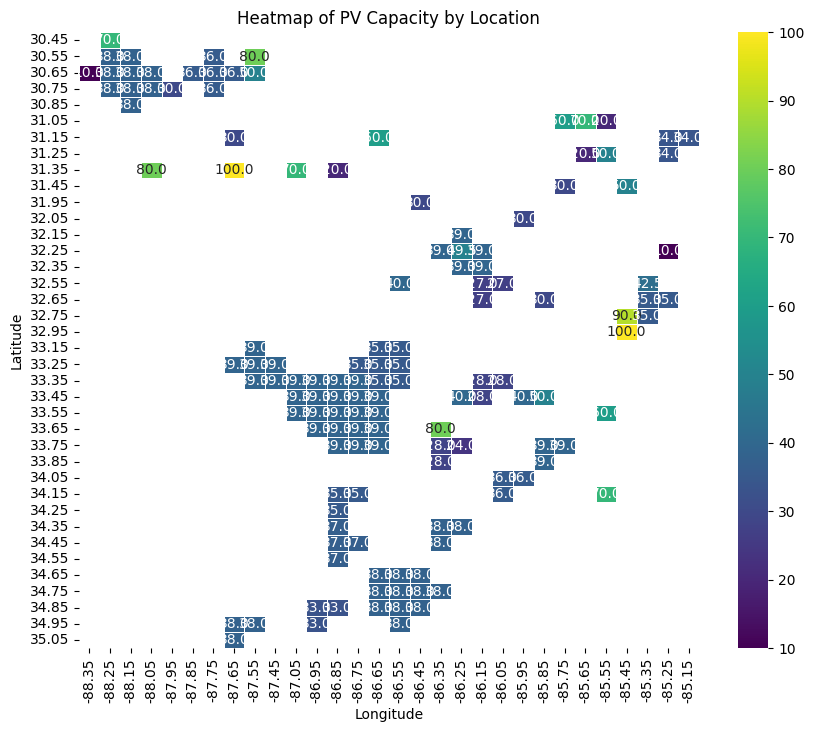

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure metadata_df has the correct data types
metadata_df['Latitude'] = metadata_df['Latitude'].astype(float)
metadata_df['Longitude'] = metadata_df['Longitude'].astype(float)
metadata_df['CapacityMW'] = metadata_df['CapacityMW'].astype(float)

# Create a pivot table for the heatmap
heatmap_data = metadata_df.pivot_table(values='CapacityMW', index='Latitude', columns='Longitude')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f", linewidths=.5)
plt.title('Heatmap of PV Capacity by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
daily_data = merged_df['Power(MW)'].resample('D').mean().to_frame()

# Create time-based features
daily_data['day_of_week'] = daily_data.index.dayofweek
daily_data['month'] = daily_data.index.month
daily_data['day_of_year'] = daily_data.index.dayofyear

# Create lagged features
daily_data['power_lag1'] = daily_data['Power(MW)'].shift(1)
daily_data['power_lag7'] = daily_data['Power(MW)'].shift(7)

# Create rolling window features
daily_data['power_rolling_mean_3d'] = daily_data['Power(MW)'].rolling(window=3).mean()
daily_data['power_rolling_mean_7d'] = daily_data['Power(MW)'].rolling(window=7).mean()

# Handle missing values introduced by lagging and rolling
daily_data = daily_data.fillna(0)

display(daily_data.head())
display(daily_data.isnull().sum())

,Power(MW),day_of_week,month,day_of_year,power_lag1,power_lag7,power_rolling_mean_3d,power_rolling_mean_7d
LocalTime,,,,,,,,
2006-01-01,1.851823,6,1,1,0.000000,0.0,0.000000,0.0
2006-01-02,4.305690,0,1,2,1.851823,0.0,0.000000,0.0
2006-01-03,5.061368,1,1,3,4.305690,0.0,3.739627,0.0
2006-01-04,6.066111,2,1,4,5.061368,0.0,5.144389,0.0
2006-01-05,5.673130,3,1,5,6.066111,0.0,5.600203,0.0


,0
Power(MW),0
day_of_week,0
month,0
day_of_year,0
power_lag1,0
power_lag7,0
power_rolling_mean_3d,0
power_rolling_mean_7d,0


In [ ]:
X = daily_data.drop('Power(MW)', axis=1)
y = daily_data['Power(MW)']

# Determine the split point (e.g., use the last 3 months for testing)
split_point = int(len(daily_data) * 0.75) # Using 75% for training

X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Training set shape (y_train):", y_train.shape)
print("Testing set shape (y_test):", y_test.shape)

Training set shape (X_train): (273, 7)
Testing set shape (X_test): (92, 7)
Training set shape (y_train): (273,)
Testing set shape (y_test): (92,)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Implement and train Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
print("Decision Tree model trained.")

# Implement and train Support Vector Regressor
# Scale the data for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVR(kernel='rbf') # Using Radial Basis Function kernel
svm_model.fit(X_train_scaled, y_train)
print("SVM model trained.")

Decision Tree model trained.
SVM model trained.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare data for Deep Learning model (LSTM)
# Reshape X_train to be 3D (samples, time steps, features)
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=100, verbose=0)
print("LSTM model trained.")

LSTM model trained.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Evaluate Decision Tree model
dt_predictions = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))

# Evaluate SVM model
svm_predictions = svm_model.predict(X_test_scaled)
svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_predictions))

# Evaluate LSTM model
X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
lstm_predictions = lstm_model.predict(X_test_lstm)
lstm_mae = mean_absolute_error(y_test, lstm_predictions)
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))

# Store results
evaluation_results = {
    "Decision Tree": {"MAE": dt_mae, "RMSE": dt_rmse},
    "SVM": {"MAE": svm_mae, "RMSE": svm_rmse},
    "LSTM": {"MAE": lstm_mae, "RMSE": lstm_rmse}
}

# Print results
print("Model Evaluation Results:")
for model, metrics in evaluation_results.items():
    print(f"{model}: MAE = {metrics['MAE']:.4f}, RMSE = {metrics['RMSE']:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step
Model Evaluation Results:
Decision Tree: MAE = 1.5343, RMSE = 1.9095
SVM: MAE = 1.4718, RMSE = 2.0541
LSTM: MAE = 1.4998, RMSE = 1.9979


In [ ]:
evaluation_df = pd.DataFrame.from_dict(evaluation_results, orient='index')
evaluation_df.index.name = 'Model'
display(evaluation_df)

,MAE,RMSE
Model,,
Decision Tree,1.534252,1.909488
SVM,1.471756,2.054101
LSTM,1.499761,1.997866


## Summary:

### Data Analysis Key Findings

*   The dataset was resampled to a daily frequency, and time-based (day of week, month, day of year) and lagged/rolling features were created.
*   The data was split into training (75%) and testing (25%) sets chronologically.
*   Decision Tree, Support Vector Regressor (SVM), and LSTM models were successfully trained on the training data. SVM required data scaling, and LSTM required data reshaping.
*   Model performance was evaluated using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).
*   On the test set, the SVM model achieved the lowest MAE (1.4718), while the Decision Tree model had the lowest RMSE (1.9095). The LSTM model's performance was comparable (MAE = 1.4998, RMSE = 1.9979).
*   The model performance comparison was presented in a table showing MAE and RMSE for each model.

### Insights or Next Steps

*   While SVM had the lowest MAE and Decision Tree the lowest RMSE, the differences in performance across the three models were relatively small on this specific test set. Further hyperparameter tuning for each model and exploring other features could potentially improve performance.
*   Consider using a different time series cross-validation strategy instead of a simple chronological split to get a more robust estimate of model performance across different time periods.
